In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
dt = 1e-4
T = 10
x0 = [1000]
t = np.linspace(0, T, int(T/dt) + 1)
N = len(t)

In [3]:
def a1(x):
    return 200/(1+x[0]**6)

def a2(x):
    return x[0]

a_1 = [[[a1, 1], [a2, -1]]]

def eq(x0, t):
    return x0*np.exp(-t)

In [4]:
def prob(a, dt):
    return a*dt

In [5]:
def method1(x0, a, dt, N):
    res = []
    x = x0[:]
    for i in range(N):
        x1 = x[:]
        for k in range(len(x0)):
            r = random.random()
            tmp_prob = 0
            for j in range(len(a[k])):
                tmp_prob += prob(a[k][j][0](x1), dt)
                if (r < tmp_prob):
                    x[k]+=a[k][j][1]
                    break
        res.append(x[:])
    return res

In [6]:
def method2(x0, a, T):
    x = x0[:]
    t = 0
    res = [[x0, 0]]
    while (t < T):
        x1 = x[:]
        a0 = 0
        for k in range(len(x0)):
            for j in range(len(a[k])):
                a0 += a[k][j][0](x1)
        if(a0 != 0):
            tau = 1/a0*np.log(1/random.random())
        else:
            tau = T
        tmp_prob = 0
        r = random.random()
        flag = False
        for k in range(len(x0)):
            if(flag):
                break
            for j in range(len(a[k])):
                if(a0 != 0):
                    tmp_prob += a[k][j][0](x)/a0
                else:
                    tmp_prob = 1
                if (r < tmp_prob):
                    x[k]+=a[k][j][1]
                    flag = True
                    break
        t += tau
        res.append([x[:], t])
    if(res[-1][-1] > T):
        res.pop()
    return res

In [7]:
res1_ = method1(x0, [[[a2, -1]]], dt, N)

In [8]:
res1 = [x[0] for x in res1_]

In [9]:
res2_ = method2(x0, [[[a2, -1]]], T)

In [10]:
res2 = []
t2 = []
for i in range(len(res2_)):
    res2.append(res2_[i][0][0])
    t2.append(res2_[i][1])

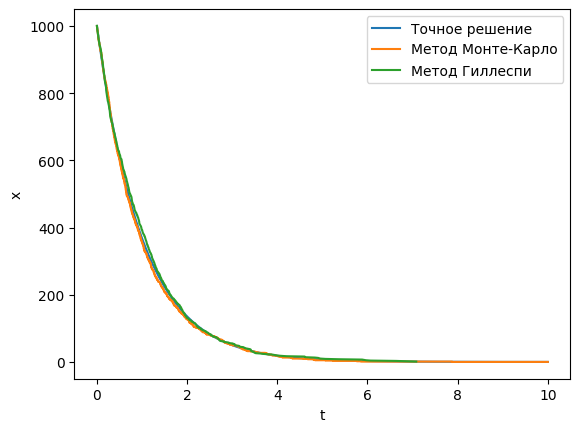

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel('t')
ax.set_ylabel('x')
y = eq(x0[0], t)
ax.plot(t, y, label='Точное решение')
ax.plot(t, res1, label='Метод Монте-Карло')
ax.plot(t2, res2, label='Метод Гиллеспи')
plt.legend()
plt.show()

In [12]:
def RK4(func, x0, h, N, history):
    for i in range(N-1):
        k1=func(x0)
        k2=func(x0+h/2*k1)
        k3=func(x0+h/2*k2)
        k4=func(x0+h*k3)
        x1=x0+h/6*(k1+2*k2+2*k3+k4)
        history.append(x1)
        x0 = x1
    return x0

In [13]:
def func_rk(x, a):
    res = [0]*len(x)
    for k in range(len(x)):
        for j in range(len(a[k])):
            res[k] += a[k][j][0](x)*a[k][j][1]
    return res
def func_rk1(x):
    return np.array(func_rk(x, a_1))
res_true = [x0]
RK4(func_rk1, x0, dt, N, res_true)

array([2.12840749])

In [14]:
res1 = method1(x0, a_1, dt, N)

In [15]:
res2_ = method2(x0, a_1, T)

In [16]:
res2 = []
t2 = []
for i in range(len(res2_)):
    res2.append(res2_[i][0])
    t2.append(res2_[i][1])

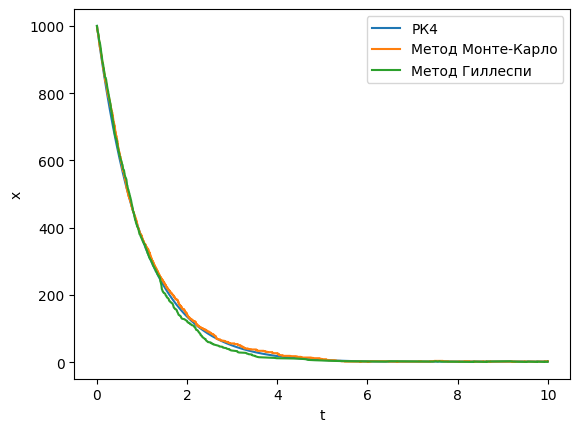

In [17]:
fig, ax = plt.subplots()
ax.set_xlabel('t')
ax.set_ylabel('x')
y = eq(x0, t)
ax.plot(t, res_true, label='РК4')
ax.plot(t, res1, label='Метод Монте-Карло')
ax.plot(t2, res2, label='Метод Гиллеспи')
plt.legend()
plt.show()

In [18]:
dt = 1e-4
T = 10
x0 = [1000, 1000]
t = np.linspace(0, T, int(T/dt) + 1)
N = len(t)

In [19]:
def b1(x):
    return 200/(1+x[0]**6)

def b2(x):
    return x[1]

def b3(x):
    return x[1]

def b4(x):
    return x[0]

In [20]:
a_2 = [[[b3, 1], [b4, -1]], [[b1, 1], [b2, -1]]]

In [21]:
res1_ = method1(x0, a_2, dt, N)

In [22]:
res1_x = [x[0] for x in res1_]
res1_m = [x[1] for x in res1_]

In [23]:
res2_ = method2(x0, a_2, T)

In [24]:
res2_x = []
res2_m = []
t2 = []
for i in range(len(res2_)):
    res2_x.append(res2_[i][0][0])
    res2_m.append(res2_[i][0][1])
    t2.append(res2_[i][1])

In [25]:
def func_rk2(x):
    return np.array(func_rk(x, a_2))
res_true = [x0]
RK4(func_rk2, x0, dt, N, res_true)

array([2.25217929, 2.22008283])

In [26]:
resrk_x = []
resrk_m = []
for i in range(len(res_true)):
    resrk_x.append(res_true[i][0])
    resrk_m.append(res_true[i][1])

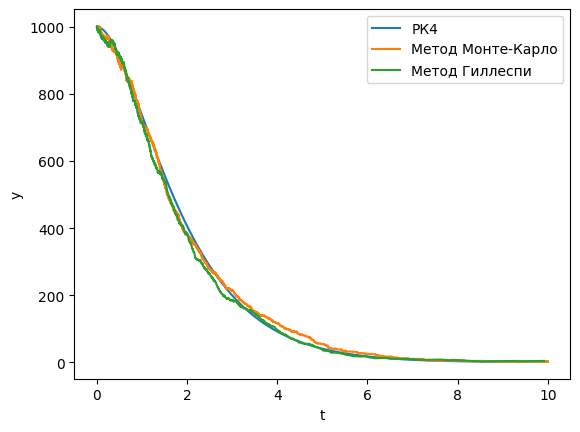

In [27]:
fig, ax = plt.subplots()
ax.set_xlabel('t')
ax.set_ylabel('y')
ax.plot(t, resrk_x, label='РК4')
ax.plot(t, res1_x, label='Метод Монте-Карло')
ax.plot(t2, res2_x, label='Метод Гиллеспи')
plt.legend()
plt.show()

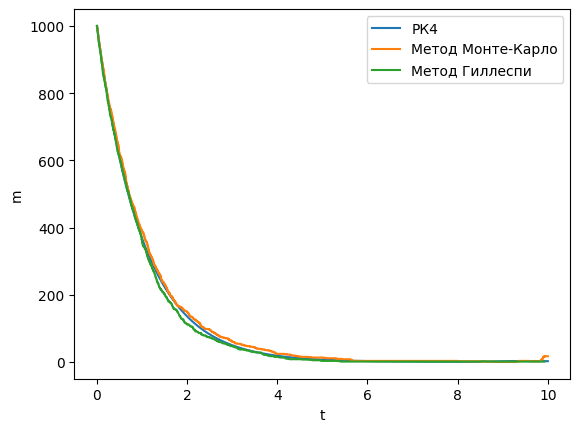

In [28]:
fig, ax = plt.subplots()
ax.set_xlabel('t')
ax.set_ylabel('m')
ax.plot(t, resrk_m, label='РК4')
ax.plot(t, res1_m, label='Метод Монте-Карло')
ax.plot(t2, res2_m, label='Метод Гиллеспи')
plt.legend()
plt.show()

In [29]:
dt = 1e-4
T = 1000
x0 = [8, 8]
t = np.linspace(0, T, int(T/dt) + 1)
N = len(t)
time1 = []
time2 = []
time3 = []
while (x0[0] < 2000):
    history = []
    start = time.perf_counter()
    method1(x0, a_2, dt, N)
    finish = time.perf_counter()
    time1.append(finish - start)
    start = time.perf_counter()
    method2(x0, a_2, T)
    finish = time.perf_counter()
    time2.append(finish - start)
    start = time.perf_counter()
    RK4(func_rk2, x0, dt, N, history)
    finish = time.perf_counter()
    time3.append(finish - start)
    print(time1[-1], time2[-1], time3[-1], x0)
    x0[0]*=2
    x0[1]*=2

10.152108200010844 0.03627899999264628 115.91764949998469 [8, 8]
9.472968699992634 0.0345081000123173 116.98256149998633 [16, 16]
10.115744999988237 0.03543390001868829 120.35927379998611 [32, 32]
9.240089300001273 0.03747469998779707 115.08261729998048 [64, 64]
9.319644300005166 0.03413760001421906 118.13071570001193 [128, 128]
9.437835599994287 0.03432000000611879 119.39039139999659 [256, 256]
9.039798499987228 0.03594939998583868 115.30409029999282 [512, 512]
9.105805700004566 0.042930299998261034 115.23912109999219 [1024, 1024]


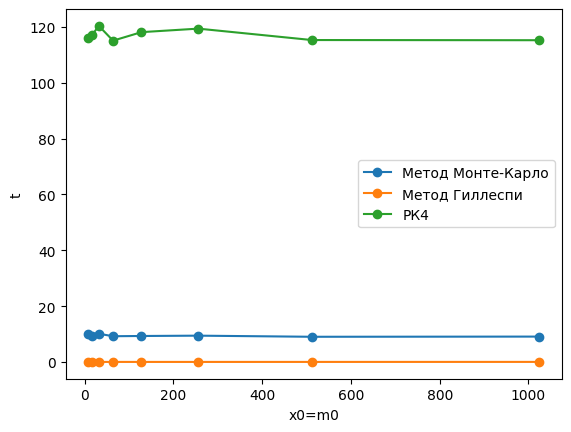

In [33]:
fig, ax = plt.subplots()
ax.set_xlabel('x0=m0')
ax.set_ylabel('t')
xt = [8, 16, 32, 64, 128, 256, 512, 1024]
ax.plot(xt, time1, label='Метод Монте-Карло', marker='o')
ax.plot(xt, time2, label='Метод Гиллеспи', marker='o')
ax.plot(xt, time3, label='РК4', marker='o')
plt.legend()
plt.show()

In [34]:
sum = 0
for item in time1:
    sum += item
print(sum/8)
sum = 0
for item in time2:
    sum += item
print(sum/8)
sum = 0
for item in time3:
    sum += item
print(sum/8)

9.48549941249803
0.03637912500198581
117.0508025749914


In [29]:
dt = 1e-4
T = 8
t = np.linspace(0, T, int(T/dt) + 1)
N = len(t)
x0 = [1000, 1000]
time1 = []
time2 = []
time3 = []
while (T < 2000):
    history = []
    start = time.perf_counter()
    method1(x0, a_2, dt, N)
    finish = time.perf_counter()
    time1.append(finish - start)
    start = time.perf_counter()
    method2(x0, a_2, T)
    finish = time.perf_counter()
    time2.append(finish - start)
    start = time.perf_counter()
    RK4(func_rk2, x0, dt, N, history)
    finish = time.perf_counter()
    time3.append(finish - start)
    print(time1[-1], time2[-1], time3[-1], T)
    T*=2
    t = np.linspace(0, T, int(T/dt) + 1)
    N = len(t)

0.07966529999976046 0.007752200006507337 0.948983699985547 8
0.21022399998037145 0.010577000008197501 1.8998031000082847 16
0.35143429998424836 0.008121899998513982 3.790420000004815 32
0.6159562999964692 0.010213100002147257 7.412952800019411 64
1.3717031999840401 0.011084700003266335 16.96373659998062 128
2.915348599985009 0.015637300006346777 28.92251919998671 256
4.98962079998455 0.027180599980056286 57.87011440002243 512
10.814634900016245 0.045733500010101125 120.72298019999289 1024


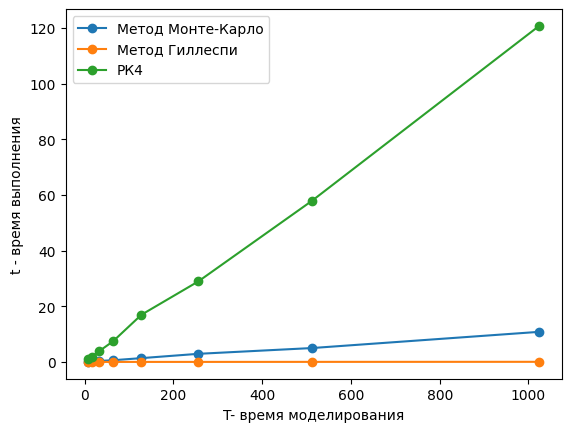

In [30]:
fig, ax = plt.subplots()
ax.set_xlabel('T- время моделирования')
ax.set_ylabel('t - время выполнения')
xt = [8, 16, 32, 64, 128, 256, 512, 1024]
ax.plot(xt, time1, label='Метод Монте-Карло', marker='o')
ax.plot(xt, time2, label='Метод Гиллеспи', marker='o')
ax.plot(xt, time3, label='РК4', marker='o')
plt.legend()
plt.show()